<span style="color:purple;font-weight:300;font-size:30px"> 
Assignment 1 - Social Graphs and Interactions
</span>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Formalia:" data-toc-modified-id="Formalia:-1">Formalia:</a></span></li><li><span><a href="#Part-1:-Binning-degree-distributions" data-toc-modified-id="Part-1:-Binning-degree-distributions-2">Part 1: Binning degree distributions</a></span></li><li><span><a href="#Part-2:-Random-networks-and-plotting-in-networkx" data-toc-modified-id="Part-2:-Random-networks-and-plotting-in-networkx-3">Part 2: Random networks and plotting in <code>networkx</code></a></span></li><li><span><a href="#Part-3:-Watts-Strogatz-Networks" data-toc-modified-id="Part-3:-Watts-Strogatz-Networks-4">Part 3: Watts-Strogatz Networks</a></span></li><li><span><a href="#Part-4.-The-Barabasi-Albert-Model" data-toc-modified-id="Part-4.-The-Barabasi-Albert-Model-5">Part 4. The Barabasi-Albert Model</a></span></li><li><span><a href="#Part-5.-Power-laws-and-the-friendship-paradox" data-toc-modified-id="Part-5.-Power-laws-and-the-friendship-paradox-6">Part 5. Power-laws and the friendship paradox</a></span></li><li><span><a href="#Part-6.-Growth-without-Preferential-Attachment" data-toc-modified-id="Part-6.-Growth-without-Preferential-Attachment-7">Part 6. Growth without Preferential Attachment</a></span></li></ul></div>

_______________

# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2022/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday September 27th, 2022 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via http://peergrade.io/

__________

In [1]:
# Install libraries
!pip install networkx

In [2]:
# Import Libraries 

import matplotlib.pyplot as plt
import random as random
import networkx as nx
import numpy as np


from IPython.display import Image
from networkx.generators.random_graphs import erdos_renyi_graph

_________

# Part 1: Binning degree distributions

**A. Binning real numbers**

  * **Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$**.
  * **Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?**
  > _The function returned two arrays, one with the values of the histogram and the other with bin edges_
  > _The two arrays have a different length,array with bin edges has one more value. There is always one more edge than the number of bins._
  * **Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.**
  > _We dealed with this problem by finding a middle point of each bin, based on it's edges values._

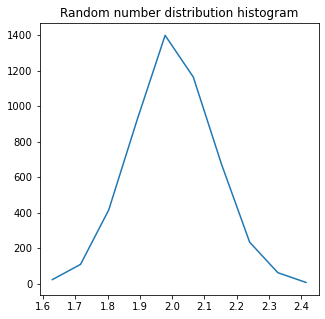

In [3]:
#Generate random  number with Gaussian distribution

n = 5000  #number of data points
mu = 2
sigma = 0.125

nums = [random.gauss(mu, sigma) for i in range(n)]

#Bining data points
hist, bin_edges = np.histogram(nums, bins=10)

#Finding the middle point for each bin
x = [(bin_edges[i] + bin_edges[i + 1]) / 2 for i in range(len(bin_edges) - 1)]

#plotting the histogram
fig = plt.figure(figsize=(5, 5))
plt.plot(x, hist)
plt.title("Random number distribution histogram")

plt.show()

**B. Binning integers**
  * **But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you.**
_**Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers.**_
> _The maximum and the minimum value are printed on the graph._
  * **Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.**
  >_The sum over bin counts is 22, what equals to the number of integers between max and min number including both of them. A vector v that results in a binning that puts each integer value as an edge of the bin and where the first edge of the bin is the minimum number we found above, and the last edge of the bin is the maximum number._ 

  * **Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution**


 Maximum value  = 23, minimum value = 1
Number of bins: 22


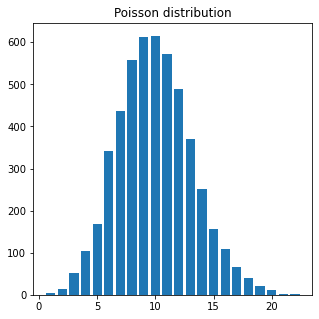

In [4]:
# Code answer

# Random numbers with Poisson distribution

lambd = 10
N = 5000

num_poi = np.random.poisson(lambd, N)

max_num = np.max(num_poi)
min_num = np.min(num_poi)

print(f' Maximum value  = {max_num}, minimum value = {min_num}')

# Creating bins vector
v = [i for i in range(min_num, max_num + 1)]

# Bining data points
hist, bin_edges = np.histogram(num_poi, bins=v)
print(f'Number of bins: {len(hist)}')

# Finding the middle point for each bin
x = [(bin_edges[i] + bin_edges[i + 1]) / 2 for i in range(len(bin_edges) - 1)]

# Plotting the histogram
fig = plt.figure(figsize=(5, 5))
plt.bar(bin_edges[:-1], height=hist)
plt.title("Poisson distribution")

plt.show()

**C. Binning and plotting degree distributions.**
  * **Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above.** 
**First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$?**

**Hint**: _**The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p = \frac{\langle k \rangle }{N-1}$.**_

  * **Now, use `networkx` to create the graph and extract the degree distribution.**
  * **Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.**

p = 0.002000400080016003


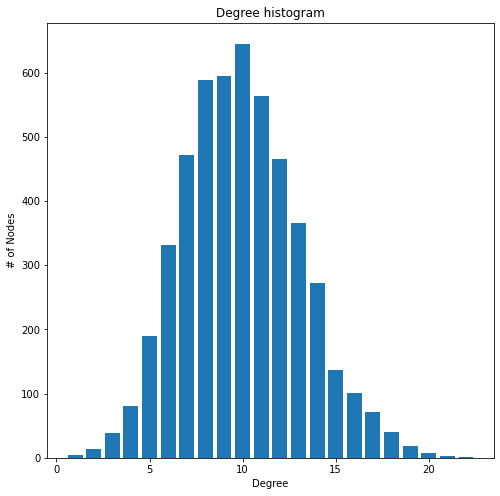

In [5]:
# Code answer
k = 10
N = 5000

p = k / (N - 1)
print(f'p = {p}')

ER_graph = nx.erdos_renyi_graph(N, p)
#nx.draw_shell(ER_graph)
#plt.show()

degree_sequence = sorted((d for n, d in ER_graph.degree()), reverse=True)
dmax = np.max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes

plt.bar(*np.unique(degree_sequence, return_counts=True))
plt.title("Degree histogram")
plt.xlabel("Degree")
plt.ylabel("# of Nodes")

plt.show()

______________

# Part 2: Random networks and plotting in `networkx`
 
**A. In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.**

**Summary of answers:**

> **a) What is the expected number of links?**
>> _The expected number of links is calculated with the formula:_ $L = p \frac{(N*(N-1)}{2} = 4498.5$. 

> **b) In which regime is the network?**
>> _To check in which regime is our network, we first calculate its average degree **k**, and then we compare it to the **k_cr** that we would obtain on the critical regime  $k_{cr} = log(N)$. In our case $k = p(N-1)= 2.9$ and $k_{cr} = log(N) = 8.006$. Since $k < log(N)$ we can state we are in supercritical regime._

> **c) Calculate the probability $p_c$ so that the network is at the critical point**
>> _At the critical point we know $k =1$ so $p_c = \frac{1}{(N-1)}= 0.00033$_

> **d)  Given the linking probability $p = 10^{–3}$, calculate the number of nodes Ncr so that the network has only one component.**
>> _To obtain the number of nodes we have to solve for N the following equation. $p_c = \frac{1}{N-1}$. Doing the appropiate caluculations we find that N = 9119._

> **e) For the network in (d), calculate the average degree 〈kcr〉 and the average distance between two randomly chosen nodes 〈d〉.**
>>_Assuming N= 9000 nodes, we calculate $k= 8.9 $ and the average distance is $d_{avg}=4.14$_


> **f) Calculate the degree distribution pk of this network (approximate with a Poisson degree distribution).**
>>_See plot below_

a) Expected number of links L = 4498.5
b) The value of k is: 2.999. And ln(N)= k_cr = 8.006367567650246. In our case, since k < ln(N), we are in supercritical regime.
c) At the critical point, k = 1. Therefore, using the formula the probability is 0.00033344448149383126.
d) The number of nodes has to be equal or bigger than: 9119
e) The average degree k: 8.999. The average distance between two random nodes 4.144064483635564
f) Plot


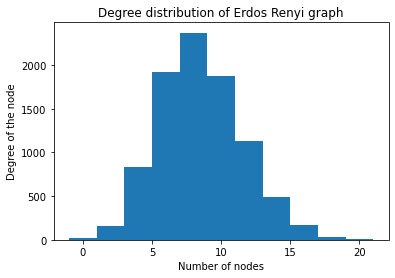

In [6]:
# Code answer

# Book Exercises:

# 3.1 Erdős-Rényi Networks

N = 3000
p = 1e-3

# What is the expected number of links?

var = (N * (N - 1)) / 2
L = p * var
print(f'a) Expected number of links L = {L}')

# In which regime is the network?

k = p * (N - 1)
k_cr = np.log(N)
print(
    f'b) The value of k is: {k}. And ln(N)= k_cr = {k_cr}. In our case, since k < ln(N), we are in supercritical regime.'
)

# Calculate the probability pc so that the network is at the critical point

p_c = 1 / (N - 1)
print(
    f'c) At the critical point, k = 1. Therefore, using the formula the probability is {p_c}.'
)

# Given the linking probability p = 10–3, calculate the number of nodes Ncr so that the network has only one component.

N_vec = np.linspace(0.01, 10000, 1000)
P_vec = np.log(N_vec) / N_vec

for idx, el in enumerate(P_vec):
    if round(el, 6) == 0.00100:
        N_idx = idx

N = int(N_vec[N_idx])

print(f'd) The number of nodes has to be equal or bigger than:', N)

# For the network in (d), calculate the average degree 〈kcr〉 and the average distance between two randomly chosen nodes 〈d〉.

N = 9000
G = nx.erdos_renyi_graph(N, p)
k_cr = np.log(N)
k_avg = p * (N - 1)
d_avg = np.log(N) / np.log(k_avg)  #avg distance
print(
    f'e) The average degree k: {k_avg}. The average distance between two random nodes {d_avg}'
)

# Calculate the degree distribution pk of this network (approximate with a Poisson degree distribution).

k = 5
np.exp(-k_avg) * k_avg**k / np.math.factorial(k)

x = [val for (node, val) in G.degree()]
counts, edges = np.histogram(x, bins=11)
print('f) Plot')
plt.bar(edges[:-1], counts, width=np.diff(edges))
plt.title("Degree distribution of Erdos Renyi graph")
plt.xlabel('Number of nodes')
plt.ylabel('Degree of the node')
plt.show()



**B. Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).**
  * **Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)**
  * **Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)**
  * **Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)**
  * **Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.**

_**By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.**_

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

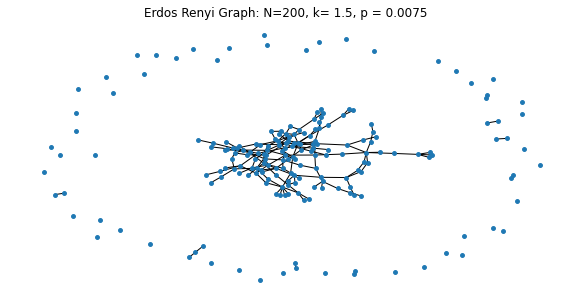

In [7]:
# Code answer

k_avg = 1.5  #average degree
N = 200  # number of nodes
p = k_avg / (N - 1)
#print(p)
G = nx.erdos_renyi_graph(N, p)

# Draw the network
plt.figure(figsize=(10, 5))
ax = plt.gca()
ax.set_title('Erdos Renyi Graph: N=200, k= 1.5, p = 0.0075')

nx.draw(G, with_labels=False, node_size=15)

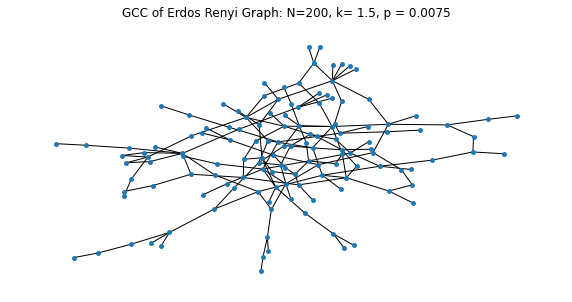

In [8]:
# Extract Giant component

# Note: For some reason, sometimes the function works and sometimes doesn't?

#con_comp = nx.connected_components(G)
largest_cc = max(nx.connected_components(G), key=len)
GCC = G.subgraph(largest_cc).copy()

# Draw it
plt.figure(figsize=(10, 5))
ax = plt.gca()
ax.set_title('GCC of Erdos Renyi Graph: N=200, k= 1.5, p = 0.0075')

nx.draw(GCC, with_labels=False, node_size=15)

The random node is: 41
The shortest paths with max 2 steps to the random node: {41: [41], 158: [41, 158], 38: [41, 158, 38], 58: [41, 158, 58], 144: [41, 158, 144], 173: [41, 158, 173]}


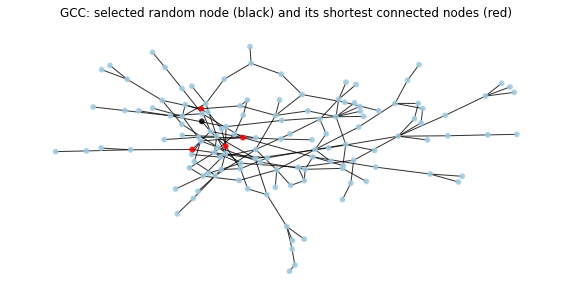

In [9]:
# Random selection and plotting loop

random_node = np.random.choice(GCC.nodes())
two_step_paths = []
# list of length of all paths in graph with max 2 distance to random node
paths_length = nx.single_source_shortest_path_length(GCC, random_node, 2)

# list of all paths in graph with max 2 distance to random node
paths_2 = nx.single_source_shortest_path(GCC, random_node, 2)

for k, v in paths_length.items():
    if v == 2:
        two_step_paths.append(k)

colormap = []

for node in GCC:
    if node in two_step_paths:
        colormap.append('#ff0000')
    elif node == random_node:
        colormap.append('000000')
    else:
        colormap.append('#A0CBE2')

print(f'The random node is: {random_node}')
print(f'The shortest paths with max 2 steps to the random node: {paths_2}')

plt.figure(figsize=(10, 5))
ax = plt.gca()
ax.set_title(
    'GCC: selected random node (black) and its shortest connected nodes (red)')

nx.draw(
    GCC,
    with_labels=False,
    node_size=15,
    node_color=colormap,
    alpha=0.8,
    linewidths=2,
    edge_color='black',
)

______________

# Part 3: Watts-Strogatz Networks

**A. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm {and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.**

> _When p = 1 the average shortest path $\langle d \rangle$ almost equals the avarage degree of the network. With increase of links that are rewired, a length of the paths between all the nodes decreases_


In [10]:
# Code answer

G1 = nx.watts_strogatz_graph(n=500, k=4, p=0)
G2 = nx.watts_strogatz_graph(n=500, k=4, p=0.1)
G3 = nx.watts_strogatz_graph(n=500, k=4, p=1)

d1 = nx.average_shortest_path_length(G1)
d2 = nx.average_shortest_path_length(G2)
d3 = nx.average_shortest_path_length(G3)

print(
    f"Average shortest path lenght :\n <d>(G1)={d1} \n <d>(G2)={d2}\n <d>(G3)={d3}"
)

Average shortest path lenght :
 <d>(G1)=62.875751503006015 
 <d>(G2)=7.352344689378757
 <d>(G3)=4.7567374749499




**B. Let's understand the behavior of the WS model as we increase _p_ in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot.**

In [11]:
# Code answer

p_list = [0, 0.01, 0.03, 0.05, 0.1, 0.2, 0.6, 0.8]

for p in p_list:
    G = nx.watts_strogatz_graph(n=500, k=4, p=p)
    d = nx.average_shortest_path_length(G)
    print(f"For p={p}  <d>={d}")

For p=0  <d>=62.875751503006015
For p=0.01  <d>=36.39050100200401
For p=0.03  <d>=16.158741482965933
For p=0.05  <d>=9.723334669338678
For p=0.1  <d>=7.72491382765531
For p=0.2  <d>=6.1913827655310625
For p=0.6  <d>=4.845098196392786
For p=0.8  <d>=4.774749498997996


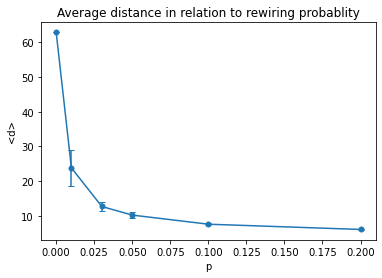

In [12]:
p_list = [0, 0.01, 0.03, 0.05, 0.1, 0.2]

d_list = []
std_list = []
for p in p_list:
    d = []
    for _ in range(50):
        G = nx.watts_strogatz_graph(n=500, k=4, p=p)
        d.append(nx.average_shortest_path_length(G))
    std_list.append(np.std(d))
    d_list.append(sum(d) / len(d))

# Plot graph

plt.errorbar(p_list, d_list, yerr=std_list, fmt='.-', ms=10, capsize=3)
plt.xlabel('p')
plt.ylabel('<d>')
plt.title('Average distance in relation to rewiring probablity')
pass

> _The plot shows the relation between the average distance ⟨d⟩ and rewiring probablity p. The data was colected based on 50 different graphs for each of the 6 probabilities. As we can observe the path length decreases when probability of re-wiring is growing. Standard deviation of observations also decreased for a larger probabilities._ 

____________

# Part 4. The Barabasi-Albert Model

_**We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success**_

**A. Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.**

In [13]:
# Code answer

# Create a graph with a single link
G1 = nx.Graph()
G1.add_edge(1, 2)
print(f'This graph has: {G1.number_of_edges()} links')

# Add 1 node connecting one of the existing nodes in proportion to their degree.
# Generate a list of edges (from the graph), and flatten it:
G1.add_node(3)
G1.add_edge(2, 3)
list_edges = list(G1.edges())
connected_nodes = list(sum(list_edges, ()))  #flatten

# Select a random node from the flattened list of edges.
# The probability of the selected node corresponds to its degree.
new_node = random.choices(connected_nodes)

# Add this new node to the graph
G1.add_nodes_from(new_node)
print(f'This graph has: {G1.number_of_edges()} links')
print(f'This graph has: {G1.number_of_nodes()} nodes')

This graph has: 1 links
This graph has: 2 links
This graph has: 3 nodes


This graph has: 99 links
This graph has: 100 nodes


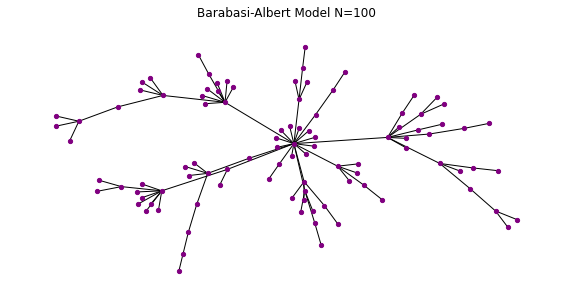

In [14]:
# Keep going until you have 100 nodes
G1.clear()
G1 = nx.Graph()
G1.add_edge(1, 2)
i = 0

for i in range(3, 101):
    list_edges = list(G1.edges())
    connected_nodes = list(sum(list_edges, ()))
    new_edge_node = random.choices(connected_nodes)
    G1.add_node(i)
    G1.add_edge(i, new_edge_node[0])

print(f'This graph has: {G1.number_of_edges()} links')
print(f'This graph has: {G1.number_of_nodes()} nodes')

# Plot the network
plt.figure(figsize=(10, 5))
ax = plt.gca()
ax.set_title('Barabasi-Albert Model N=100')

nx.draw(G1,
        node_size=18,
        with_labels=False,
        font_weight='bold',
        node_color='purple')

**B. Now create a 5000 node network.**
  * **What's the maximum and minimum degree?**
  * **Now, bin the degree distribution, for example using `numpy.histogram`.**
  * **Plot the distribution. Plot it with both linear and log-log axes.**

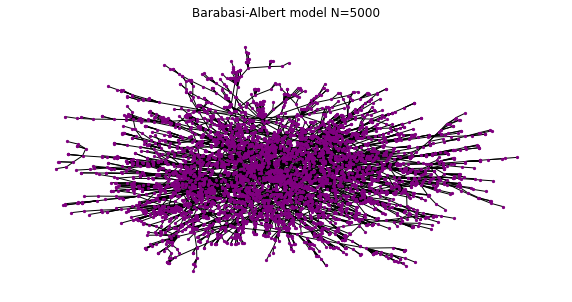

In [15]:
# Code answer

# Add more nodes until 5000
G1.clear()
G1 = nx.Graph()
G1.add_edge(1, 2)
i = 0

#WARNING: This one takes a while to run

for i in range(3, 5001):
    list_edges = list(G1.edges())
    connected_nodes = list(sum(list_edges, ()))
    new_edge_node = random.choices(connected_nodes)
    G1.add_node(i)
    G1.add_edge(i, new_edge_node[0])

# Plot the network again
plt.figure(figsize=(10, 5))
ax = plt.gca()
ax.set_title('Barabasi-Albert model N=5000')

nx.draw(G1,
        node_size=5,
        with_labels=False,
        font_weight='bold',
        node_color='purple')

In [16]:
# Max and min degree

#Get nodes from the graph
list_of_nodes = G1.nodes()

#Dictionary with the nodes and their degree
dic_nodes_degrees = dict(G1.degree(list_of_nodes))


# Get max degree (value) and node (key)
def get_maxmin_degree(d, max_degree=True):
    """
    get_maxmin_degree() extracts the node and the degree of a dictionary of given tuples from a graph

    :param d (dictionary): dictionary of nodes and their degree
    :param max_degree (boolean): True if max degree, False if min degree

    :returns: tuple (node,degree) with max or min value

    """
    if max_degree == True:
        max_key = max(d, key=d.get)
        reslt_pair = tuple([max_key, d[max_key]])
        #print(reslt_pair)
    else:
        min_key = min(d, key=d.get)
        reslt_pair = tuple([min_key, d[min_key]])
        #print(reslt_pair)
    return reslt_pair


node_max_degree = get_maxmin_degree(dic_nodes_degrees, max_degree=True)
node_min_degree = get_maxmin_degree(dic_nodes_degrees, max_degree=False)
print(f'The node with the max degree is {node_max_degree}')
print(f'The node with the min degree is {node_min_degree}')

The node with the max degree is (1, 121)
The node with the min degree is (17, 1)


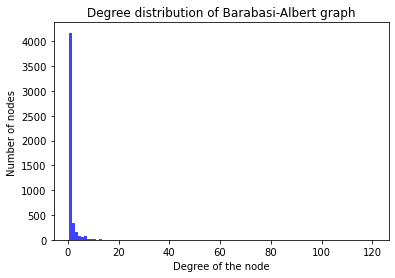

In [17]:
# Bin the degree distribution using np.histogram

x = [val for (node, val) in G1.degree()]
counts, edges = np.histogram(x, bins=100)

plt.bar(edges[:-1], counts, width=np.diff(edges), facecolor='b', alpha=0.75)
plt.title("Degree distribution of Barabasi-Albert graph")
plt.xlabel('Degree of the node')
plt.ylabel('Number of nodes ')
plt.show()
pass

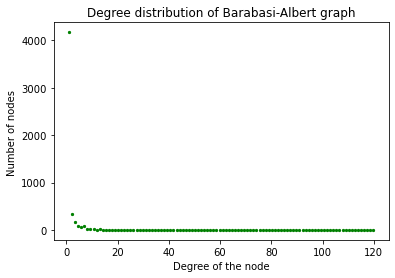

In [18]:
# Plot the degree distribution
plt.scatter(edges[:-1], counts, s=5, c='green')
plt.title("Degree distribution of Barabasi-Albert graph")
plt.xlabel('Degree of the node')
plt.ylabel('Number of nodes ')
pass

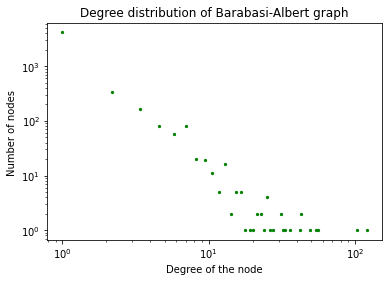

In [19]:
plt.scatter(edges[:-1], counts, s=5, c='green')
plt.yscale('log', base=10)
plt.xscale('log', base=10)
plt.title("Degree distribution of Barabasi-Albert graph")
plt.xlabel('Degree of the node')
plt.ylabel('Number of nodes ')
pass

In [20]:
# Slope of F_BA for part 5
slope, intercept = np.polyfit(np.log(edges[:10]), np.log(counts[:10]), 1)
print(slope)

-2.415742194789549


___________

# Part 5. Power-laws and the friendship paradox


**Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ has fewer friends than their friends have, on average\*. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated (let's call this network F-BA for *friendship BA*). Do the following:**

**A. The friendship paradox in BA networks**
* **Pick a node $i$ at random (e.g. use `random.choice`). [Find its degree](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html).**
* **Find $i$'s [neighbors](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.Graph.neighbors.html?highlight=neighbors#networkx.Graph.neighbors). And calculate their average degree.**
* **Compare the two numbers to check if it's true that $i$'s friends (on average) have more friends than $i$.**
* **Do this 1000 times. How many out of those 1000 times is the friendship paradox true in F-BA?**


In [21]:
# Code answer

def check_paradox(G, N=1000):

    paradox = []

    for _ in range(N):

        i_node = random.choice(list(G.nodes))
        i_degree = G.degree(i_node)
        #print(f'i node degree =  {i_degree}')

        i_neighbors = list(G.neighbors(i_node))

        neighbors_degree = []
        for node in i_neighbors:
            neighbors_degree.append(G.degree(node))

        average_neighbor_degree = sum(neighbors_degree) / len(neighbors_degree)
        #print("Avarage neighbor degree: {}")

        if average_neighbor_degree > i_degree:
            paradox.append(True)
        else:
            paradox.append(False)

    print(f" Paradox was true {paradox.count(True)} times out of {N} times")
    return paradox.count(True)


# Checking for a 1000 times
check_paradox(G1, N=1000)

 Paradox was true 863 times out of 1000 times


863

In [22]:
# Checking for 100 times
check_paradox(G1, N=100)

 Paradox was true 89 times out of 100 times


89

**B. The friendship paradox more generally**
* **What if the power law is flatter, e.g. $p(k) \sim k^{-\gamma}$ with $\gamma = 1.5$? Will the fraction of times the paradox is true be higher or lower?** **First answer this question by simply reasoning. Think about what it would mean in terms of hubs that the power law is flatter?**
 > _The friendship paradox can be explaind by the fact that we are more likely to be friends with hubs than with small-degree nodes, simply because hubs have more friends than the small nodes. For the networks with the flatter power law, we can assume that they have less hubs, and more small-degree nodes. Based on this fact we believe that the fraction of times the paradox is true will be higher, because there are fewer high-degree nodes (hubs), and therefore less "popular" people. (See figure c) from image below)._

In [23]:
#Image(Image(url= "http://networksciencebook.com/images/ch-04/figure-4-6.jpg", height=500, width=500))

 - **Now simulate a new network with the slope mentioned above. You can generate networks with power-law degree distributions using the [configuation model](https://en.wikipedia.org/wiki/Configuration_model). The `networkx` funtion is here [`nx.configuration_model`](https://networkx.org/documentation/stable/reference/generated/networkx.generators.degree_seq.configuration_model.html). I suggest you make the network pretty big ... let's say 5000 nodes or more.**
    * Hint 0: In the `networkx` function mentioned above, you need a degree sequence. This can be created using the so-called transformation method. If we can generate a random real number $r$ uniformly distributed in the range $0 \leq r < 1$, then $x = x_{\textrm{min}}(1 – r)^{-1/\alpha - 1}$ is a random power-law-distributed real number in the range $x_{\textrm{min}} \leq x < \infty$ with exponent $\alpha$. Note that there has to be a lower limit $x_\textrm{min}$ on the range; the power-law distribution diverges as $x\rightarrow 0$. See [this paper](https://www.cs.cornell.edu/courses/cs6241/2019sp/readings/Newman-2005-distributions.pdf) for more details.
    * Hint 1: The sequence generated using the method mentioned above consists of real numbers, we need integers, so it needs to be rounded as well.
    * Hint 2: Also, due to some details of how the configuation works (see the [wiki page](https://en.wikipedia.org/wiki/Configuration_model) for details), the sequence cannot have a sum which is an odd number, so if your sequence turns out odd, just choose an element and add 1 to its degree, that way the sum will be an even number.

In [24]:
# Generate sequence (for the sake of computational resources, we choose a sequence of 100 instead of 5000)
sequence = nx.utils.powerlaw_sequence(101, exponent=1.5,
                                      seed=42)  # this gives and odd sequence
# Hint 1: convert to integers
sequence = [int(x) for x in sequence]
# Hint 2, we choose an element and add 1 to its degree
sequence[0] = sequence[0] + 1

#Build graph from generated sequence
G = nx.configuration_model(sequence)

In [25]:
check_paradox(G, N=100)

 Paradox was true 96 times out of 100 times


96

- **Did you reason correctly above? For what fraction of the time is the friendship paradox true for your network with a new slope?**
> _We reasoned correctly as we said that the fraction of times the friendship paradox will happen will be higher. For a network of N=100 nodes, the paradox was true more times than for the previous network._
- **Now generate a network for the configuration model that has *the same slope and number of nodes as F-BA in 5.A above*; let's call this new network F-CM (for *friendship configuration model*).**


In [26]:
# Code answer

# Generate sequence
# The slope in F_BA is aprox 2.23 (see last code cell of part 4).
sequence = nx.utils.powerlaw_sequence(101, exponent=2.23,seed=42)  # this gives and odd sequence
# Hint 1: convert to integers
sequence = [int(x) for x in sequence]
# Hint 2, we choose an element and add 1 to its degree
sequence[0] = sequence[0] + 1

#Build graph from generated sequence
F_CM = nx.configuration_model(sequence)

In [27]:
check_paradox(F_CM, N=100)

 Paradox was true 88 times out of 100 times


88

 - **What fraction of the time is the friendship paradox is true for the F-CM network?**
 > _The friendship paradox is true a smaller fraction of times, because the exponent of F_CM is higher._


- **Assuming that F-BA and F-CM have the same degree sequence can now *think* about if F-BA and F-CM are different with respect to the friendship paradox. Specifically, please explain your thoughts on the following topics**
    * **Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? I might consider how network properties like assortativity, clustering, community-structure, etc potentially could impact things (it's OK to search online and add references to your answer).**
        > _There are other factors that can affect the friendship paradox. **Assortativity** could potentially be one of them. These networks tend to have hubs that link to each other and avoid linking to small-degree nodes. At the same time the small-degree nodes tend to connect to other small-degree nodes. An extreme manifestation of this pattern is a perfectly assortative network, in which each degree-k node connects only to other degree-k nodes. When hubs tend to connect to other hubs, the higher is the degree k of a node, the higher is the average degree of its nearest neighbors. [[1]](http://networksciencebook.com/chapter/7#measuring-degree)_

        > _If we think about the friendship relationships, we could agree that assortative networks will lead to the paradox being true more times, as many popular people ('hubs') will only link with other popular people of the same degree or higher._
    * **How would you test more rigorously if the friendship-paradox is actually true equally often in F-BA and F-CM? (E.g. how would you run a statistical test to investigate ... or how would you put error-bars on your plots?)**
    
        > _In order to conduct a statistical test, we would create multiple networks with different $\gamma$ values. Then, for each of these networks, we would count the mean and standard deviation._

_________

# Part 6. Growth without Preferential Attachment

**Finally, we'll build a network of same size and degree as in Part 5, using the growth mechanism without the preferential attachment. Follwo the steps below for success**

* **Grow a network with the same parameters as above, i.e. 5000 nodes, each new node connects to the existing network, but have the incoming nodes connect to the existing nodes with equal probability. Let's call this the Sune-network.**
* **Generate an ER network of same size and same $p$ as the Sune-network.**

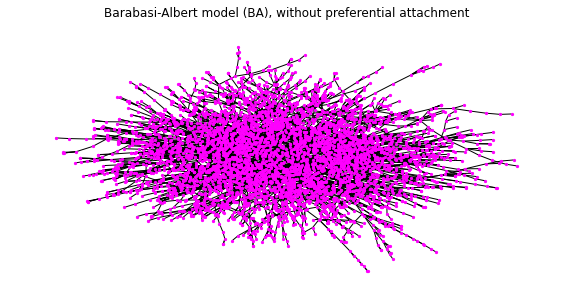

In [28]:
# Sune-Network:
# To avoid preferential attachment we will just select a random node
# every time from the all nodes in the graph
G2 = nx.Graph()
G2.add_edge(1, 2)
G2.nodes()

i = 0
for i in range(3, 5001):
    list_nodes = list(G2.nodes())
    new_edge = random.choices(list_nodes)
    # add another node with random linking to the other existing ones
    G2.add_node(i)
    G2.add_edge(i, new_edge[0])

# Plot the network
plt.figure(figsize=(10, 5))
ax = plt.gca()
ax.set_title('Barabasi-Albert model (BA), without preferential attachment')

nx.draw(G2,
        node_size=5,
        with_labels=False,
        font_weight='bold',
        node_color='magenta')

The average degree is: 1.9996


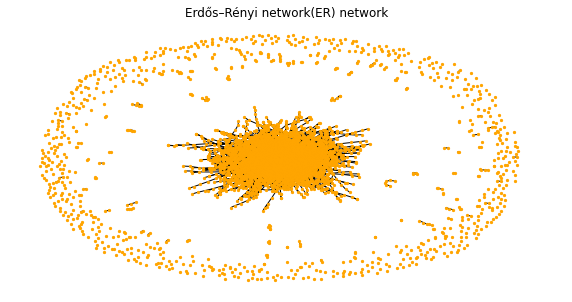

In [29]:
# Generate an ER network of same size and same p as the Sune-network.

# Calculate k
k = np.mean(list(dict(G2.degree).values()))
print(f'The average degree is: {k}')

# Create ER net
G3 = erdos_renyi_graph(5000, p=k / 5000)

# Plot the network
plt.figure(figsize=(10, 5))
ax = plt.gca()
ax.set_title('Erdős–Rényi network(ER) network')

nx.draw(G3,
        node_size=5,
        with_labels=False,
        font_weight='bold',
        node_color='orange')

* **What are the differences between the ER network and the Sune-network? Explain in your own words.** 
  * _***Hints*: To get started, plot the two degree distribution in the same plot. Compare and contrast. Another revealing network property to study is the the number of connected components.**_

  > _We can observe differences between the BA network without preferential attachment and the ER network first by taking a look at the number of nodes with 0 neighbours. As shown in the graph below, BA nodes always have **at least** one neighbour. This happens because **every node** we add is linked randomly with one of the other nodes in the graph._
  >_In contrast, in the ER network, **each edge has a fixed probability** of being present or absent, independently of the other edges, meaning that **single nodes can exist (nodes with 0 neighbours)**._
  >_Furthermore, if we take a look closely at the distribution, in the ER network we can see how there are no nodes with more than 7 degrees, while in the BA without preferential attachment there are nodes with up to 12 degrees._

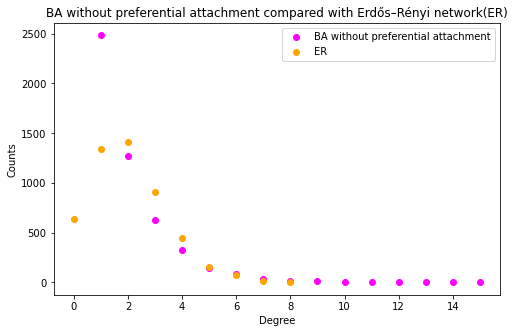

In [30]:
#Plot the two degree distribution in the same plot. Compare and contrast.

#BA no preferential attachment
bins = list(range(min(dict(G2.degree).values()),max(dict(G2.degree).values()) + 1, 1))
n, bins = np.histogram(list(dict(G2.degree).values()), bins)

# ER network
bins2 = list(range(min(dict(G3.degree).values()), max(dict(G3.degree).values()) + 1, 1))
n2, bins2 = np.histogram(list(dict(G3.degree).values()), bins2)

plt.figure(figsize=(8, 5))
plt.plot(bins[:-1],n,'o',c='magenta',label='BA without preferential attachment')
plt.plot(bins2[:-1], n2, 'o', c='orange', label='ER')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('BA without preferential attachment compared with Erdős–Rényi network(ER)')
plt.legend()
plt.show()

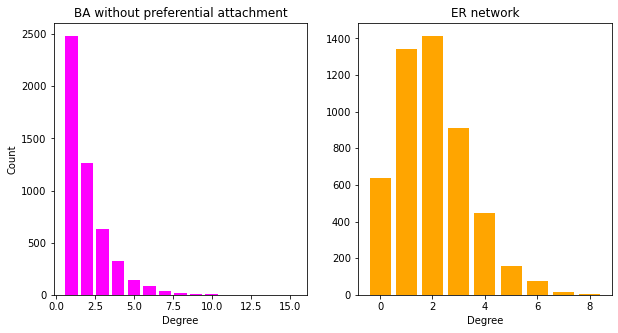

In [31]:
# Plot both distributions separately to analyze better
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.bar(bins[:-1],n, color='magenta',label='BA without preferential attachment')
ax2.bar(bins2[:-1],n2,color ='orange',label='ER')
ax1.set_title('BA without preferential attachment')
ax1.set_xlabel('Degree')
ax1.set_ylabel('Count')
ax2.set_title('ER network')
ax2.set_xlabel('Degree')
pass

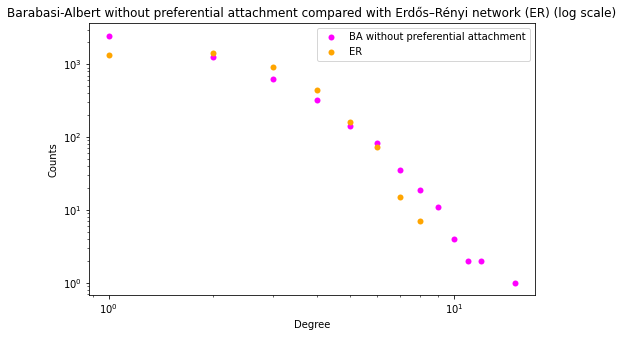

In [32]:
# Convert to logscale
fig = plt.figure(figsize=(8,5))
ax = plt.gca()
ax.plot(bins[:-1],n, 'o', c='magenta', markeredgecolor='none',label='BA without preferential attachment')
ax.plot(bins2[:-1],n2, 'o', c='orange', markeredgecolor='none',label='ER')
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Barabasi-Albert without preferential attachment compared with Erdős–Rényi network (ER) (log scale)')
plt.legend()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bb8bd0b6-4d87-4bed-87c7-5404ec14f478' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>